In [2]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

 


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
net = models.Sequential()
net.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
net.add(layers.Dense(10,activation='softmax'))

In [4]:
net.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
train_images= train_images.reshape((60000,28*28))
train_images= train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images= test_images.astype('float32')/255

In [6]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [8]:
net.fit(train_images, train_labels, epochs=5, validation_batch_size=128)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - accuracy: 0.9911
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0277 - accuracy: 0.9927
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0229 - accuracy: 0.9940
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0183 - accuracy: 0.9950
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - accuracy: 0.9958


In [9]:
test_loss,test_acc= net.evaluate(test_images,test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9813
0.10123661160469055
0.9812999963760376


In [17]:
import numpy as np
res = net.predict([np.array(test_images[0]).astype('float32').reshape((1,784))])
res.argmax()

1/1 [==============================] - 0s 20ms/step


7

In [ ]:
net.save('MNIST_Handwritting.h5')

In [ ]:
test_images[0].shape

(784,)

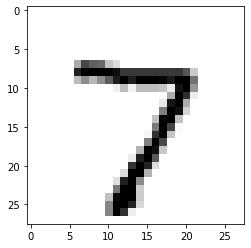

In [16]:
dig =test_images[0].reshape((28,28))
import matplotlib.pyplot as plt
plt.imshow(dig,cmap=plt.cm.binary)
plt.show()